In [ ]:
# https://github.com/fingoldin/pycorels
# https://corels.eecs.harvard.edu/corels/

In [4]:
from corels import *

X, y, features = load_from_csv("../dataset/compas.csv")
clf = CorelsClassifier(n_iter=1000, c=0.01, max_card=5, policy="bfs", verbosity=["progress"])

In [5]:
clf

In [6]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5049, 27), (2165, 27), (5049,), (2165,))

In [ ]:
%time clf.fit(X_train, y_train, features=features)

features

In [ ]:
print(clf)

In [ ]:
(clf.predict(X_test) == y_test).mean()

In [ ]:
confusion_matrix(y_test, clf.predict(X_test))

In [ ]:
#

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
args = {'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_features': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 0.03, 'min_samples_split': 0.03, 'random_state': 1492, 'splitter': 'random',
       'max_depth': 3}
dt = DecisionTreeClassifier(**args)

%time dt.fit(X_train, y_train)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 11.3 ms


DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=0.03, min_samples_split=0.03,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1492,
            splitter='random')

In [37]:
(dt.predict(X_test) == y_test).mean(), (dt.predict(X_train) == y_train).mean()

(0.6600461893764434, 0.6625074272133096)

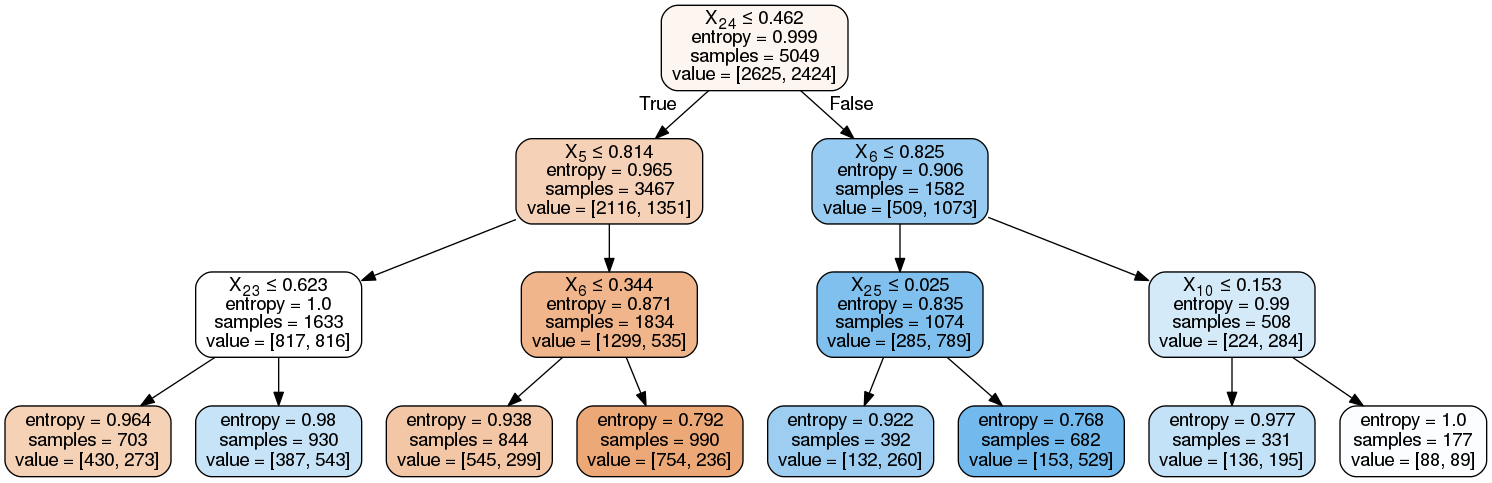

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
?StringIO

Init signature: StringIO(initial_value='', newline='\n')
Docstring:     
Text I/O implementation using an in-memory buffer.

The initial_value argument sets the value of object.  The newline
argument is like the one of TextIOWrapper's constructor.
Type:           type
Subclasses:     CUnicodeIO, _SpoofOut


In [ ]:
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features)

In [ ]:
dot_data.get_value()

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


In [9]:
features

['Age=18-20',
 'Age=18-22',
 'Age=18-25',
 'Age=24-30',
 'Age=24-40',
 'Age>=30',
 'Age<=40',
 'Age<=45',
 'Gender=Male',
 'Race=African-American',
 'Race=Caucasian',
 'Race=Asian',
 'Race=Hispanic',
 'Race=Native-American',
 'Race=Other',
 'Juvenile-Felonies=0',
 'Juvenile-Felonies=1-3',
 'Juvenile-Felonies>3',
 'Juvenile-Crimes=0',
 'Juvenile-Crimes=1-3',
 'Juvenile-Crimes>3',
 'Juvenile-Crimes>5',
 'Prior-Crimes=0',
 'Prior-Crimes=1-3',
 'Prior-Crimes>3',
 'Prior-Crimes>5',
 'Current-Charge-Degree=Misdemeanor']